# Задача для определения региона добычи нефти 

У нас есть данные 10 тысяч месторождений - объем и качество нефтеи. Мы хотим построить модель для определения регона разработка которого принесет наибольшую прибыль

# 1. Изучим и подготовим данные

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from numpy.random import RandomState
import seaborn as sns

Запишем файлы список датафреймов

In [2]:
dfs = []
for i in range(0,3):
    df = pd.read_csv(r'C:\Users\Nikolay\My_DS_projects\datasets\geo_data_{}.csv'.format(i))
    dfs.append(df)

Посмотрим общую информацию

In [3]:
for df in dfs:
    display(df.head())
for df in dfs: 
    display(df.info())
for df in dfs:
    display(df.describe())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Визуализируем распределение значений в полях f0-2 и product

Регион 1


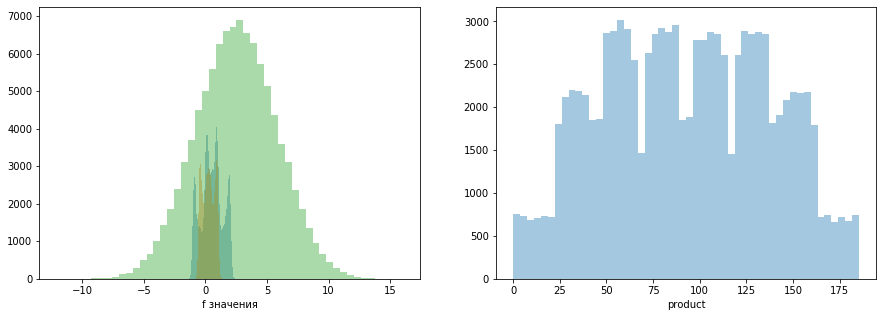

Регион 2


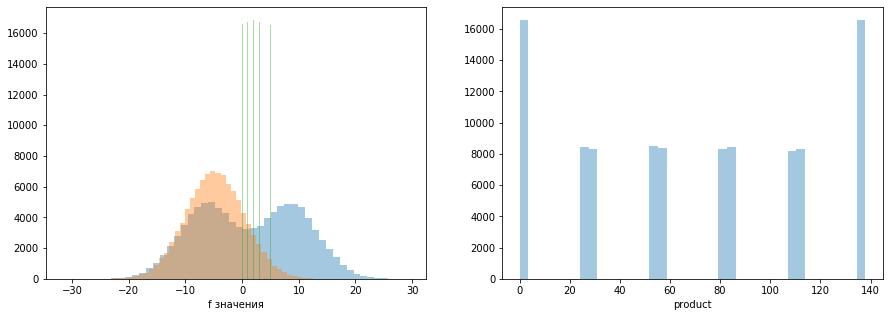

Регион 3


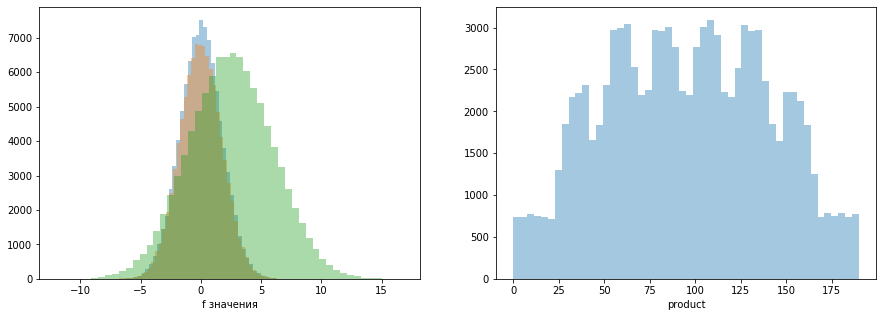

In [4]:
for i in range(len(dfs)):
    df = dfs[i] 
    print('Регион', i+1)
    fig, (ax1, ax2) = plt.subplots(ncols=2)
    fig.set_size_inches(15, 5)
    for i in range(0,3):
        sns.distplot(pd.Series(df['f{}'.format(i)], name="f значения"), kde=False, ax=ax1)
    sns.distplot(df['product'], label='product', kde=False, ax=ax2)
    plt.show()

Посмотрим как значения переменных f коррелируют с запасом нефти

Регион 1


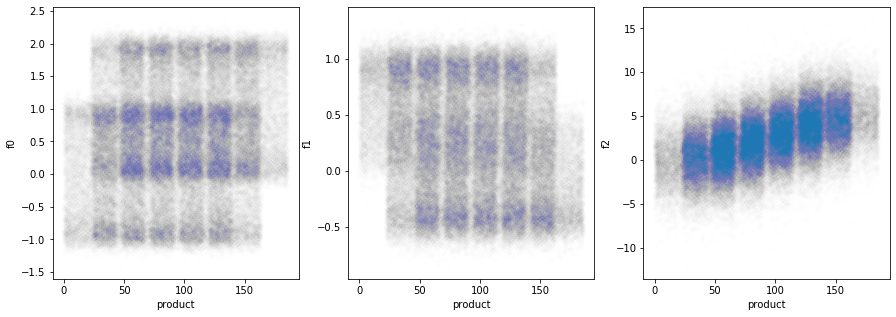

Регион 2


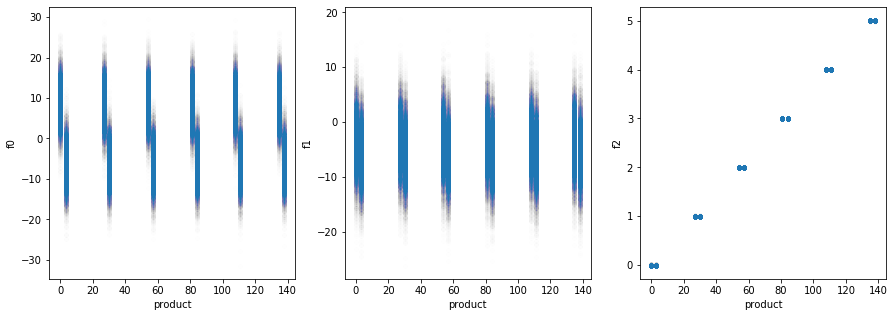

Регион 3


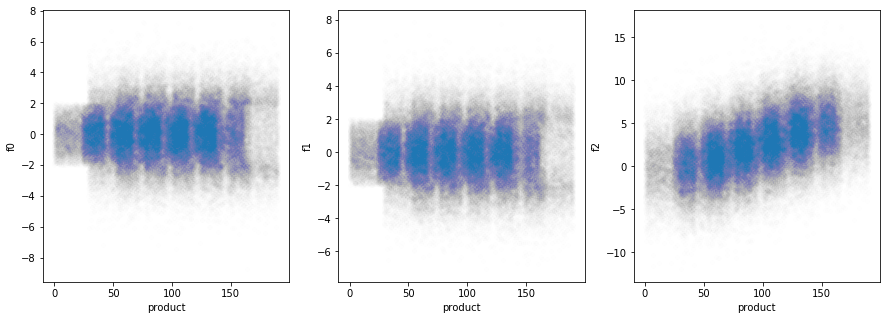

In [5]:
for i in range(len(dfs)):
    df = dfs[i]
    print('Регион', i+1)
    fig, (ax1,ax2,ax3) = plt.subplots(ncols=3)
    fig.set_size_inches(15, 5)
    df.plot(x='product', y='f0', kind='scatter', alpha=0.005, ax=ax1)
    df.plot(x='product', y='f1', kind='scatter', alpha=0.005, ax=ax2)
    df.plot(x='product', y='f2', kind='scatter', alpha=0.005, ax=ax3)
    plt.show()    

Проверим данные на дубликаты

In [6]:
for i in range(len(dfs)):
    df = dfs[i]
    print('Регион',i+1)
    print('Дублирующих записей в поле id', len(df[df['id'].duplicated()==True]))
    print('Полностью дублирующих строк', len(df[df.duplicated()==True]))
    print('_'*42)    

Регион 1
Дублирующих записей в поле id 10
Полностью дублирующих строк 0
__________________________________________
Регион 2
Дублирующих записей в поле id 4
Полностью дублирующих строк 0
__________________________________________
Регион 3
Дублирующих записей в поле id 4
Полностью дублирующих строк 0
__________________________________________


### Вывод
- Предоставленные таблицы не содержат пропусков.  
- Есть записи c повторяющимися значениями в поле id, но они имеют разные значения по другим полям - оставим их
- Во втором регионе (датафрейм 1) аномальное распределение параметра f2  
- Во всех регионах количество продукта очевидно коррелирует с значением f2, особенно это заметно во втором регионе (датафрейм 1)

# 2. Обучим и проверим модели

Обучим модели по каждому региону и выведем значения метрик для оценки качества моделей

In [7]:
def liner_regression(df):
    X = df.drop(['id','product'], axis=1)
    y = df['product']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=12345)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    
    mse = mean_squared_error(y_valid, y_pred) #считаем метрики качества модели
    rmse = mse**0.5
    mse_mean = mean_squared_error(y_valid, pd.Series(y_train.mean(), index=y_valid.index))
    rmse_mean = mse_mean**0.5
    avg_predict = y_pred.mean()
    r2 = r2_score(y_valid, y_pred)
    mae = mean_absolute_error(y_valid, y_pred)
    
    target_valid_and_predicted = pd.DataFrame(data=y_valid.reset_index(drop=True)) #сохраняем значения target и predict предварительно сбросив индексы
    target_valid_and_predicted['predict']=y_pred
    return {'rmse':rmse,'rmse_mean':rmse_mean,'avg_predict':avg_predict,'r2':r2,'mae':mae,'target_valid_and_predicted':target_valid_and_predicted}

def make_few_regressions(dfs):
    targets_and_predicts = []
    for i in range(len(dfs)):
        df = dfs[i]
        result = liner_regression(df)
        print('Регион',i+1)
        print('RMSE =', result.get('rmse'))
        print('RMSE при заполнении средним значением =', result.get('rmse_mean'))
        print('Средний запас предсказанного сырья по скважине', result.get('avg_predict'))
        print('R2 =', result.get('r2'))
        print('MAE =', result.get('mae'))
        print('_'*42)
        targets_and_predicts.append(result.get('target_valid_and_predicted'))
    return targets_and_predicts

In [8]:
targets_and_predicts = make_few_regressions(dfs)

Регион 1
RMSE = 37.5794217150813
RMSE при заполнении средним значением = 44.289591053907365
Средний запас предсказанного сырья по скважине 92.59256778438038
R2 = 0.27994321524487786
MAE = 30.919600777151313
__________________________________________
Регион 2
RMSE = 0.893099286775616
RMSE при заполнении средним значением = 46.02144533725471
Средний запас предсказанного сырья по скважине 68.72854689544602
R2 = 0.9996233978805127
MAE = 0.718766244212475
__________________________________________
Регион 3
RMSE = 40.02970873393434
RMSE при заполнении средним значением = 44.90234968510567
Средний запас предсказанного сырья по скважине 94.96504596800489
R2 = 0.20524758386040443
MAE = 32.792652105481814
__________________________________________


### Вывод

Наилучших показателей метрик качества модели удалось достичь во втором регионе: корень из средней квадратичной ошибки (RMSE) < 1 тысячи барралей, коэффициент детерминации близок к 1, среднее абсолютное отклонение < 1.
В первом и третем регионе показатели лучше чем если бы мы заполняли средним, но отклонение в 30 тысяч барралей где среднее значение на скважину 90 тысяч - это много.

# 3. Подготовимся к расчёту прибыли

Введем переменные стоимости разработки региона, стоимости тысячи баррелей нефти и возможное для разработки количество скважин

In [9]:
region_development_price = 10000000000
thousand_barrel_price = 450000
wells = 200

Посчитаем необходимый объем нефти для безубыточной разработки региона и среднее значение на скважину

In [10]:
required_volume = region_development_price/thousand_barrel_price
required_volume_per_well = required_volume/wells
print('Необходимый объем добычи нефти для безубыточной разработки региона',required_volume)
print('Необходимый средний объем добычи нефти с скважины для безубыточной разработки региона',required_volume_per_well)

Необходимый объем добычи нефти для безубыточной разработки региона 22222.222222222223
Необходимый средний объем добычи нефти с скважины для безубыточной разработки региона 111.11111111111111


In [11]:
for i in range(len(dfs)):
    df = dfs[i]
    avg_in_region = df['product'].mean()
    print('Среднее значение запасов нефти в регионе',i+1,'=',avg_in_region)    

Среднее значение запасов нефти в регионе 1 = 92.49999999999976
Среднее значение запасов нефти в регионе 2 = 68.82500000002561
Среднее значение запасов нефти в регионе 3 = 95.00000000000041


Напишем функцию которая будет принимать наши предсказания и фактические запасы нефти, выбирать 200 лучших скважин по предсказаниям и расчитывать прибыль (или убыток!)

In [12]:
def calculate_profit(df_target_and_predict):
    df_best_target_and_predict = df_target_and_predict.sort_values(by='predict', ascending=False).head(wells).reset_index(drop=True)
    product_volume_sum = df_best_target_and_predict['product'].sum()
    product_volume_avg = df_best_target_and_predict['product'].mean()
    income = product_volume_sum * thousand_barrel_price
    profit = income - region_development_price
    return {'wells':len(df_best_target_and_predict),'product_volume_sum':product_volume_sum,'product_volume_avg':product_volume_avg,'profit':profit,'best_predicted_wells':df_best_target_and_predict}

### Вывод
При стоимости разработки 200 скважин в одном регионе в 10 млрд, для безубыточной разработки необходимо получить 22.2 млн баррелей нефти, что составляет 111 тысяч баррелей на скважину  
Средние значения запасов скважины в регионе 1 и регионе 3 - 92.5 и 95 тысяч баррелей, в регионе 2 - 68.8 тысяч баррелей  
Для безубыточной разработки региона необходимо добиться показателей со скважины выше среднего

# 4. Расчитаем прибыль и риски 

Рассчитаем прибыль по 200 скваженам с лучшими предсказаниями в каждом регионе из всей валидационной выборки

Регион 1
Прибыль от разработки 200 скважин составляет 3.3208260431398524 млрд рублей
Общее количество нефти 29.601835651421894 млн баррелей
Cреднее значение запасов нефти на скважину 148.00917825710948 тысяч баррелей


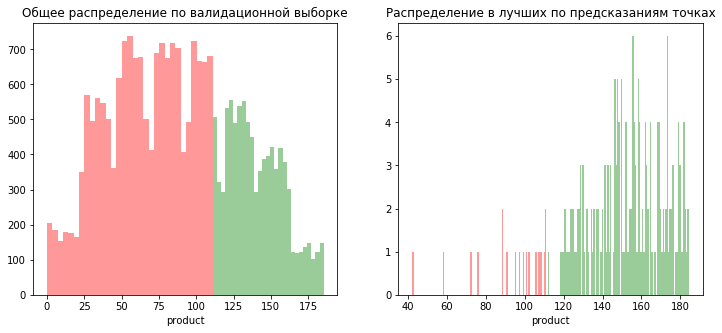

__________________________________________
Регион 2
Прибыль от разработки 200 скважин составляет 2.4150866966815108 млрд рублей
Общее количество нефти 27.589081548181138 млн баррелей
Cреднее значение запасов нефти на скважину 137.94540774090612 тысяч баррелей


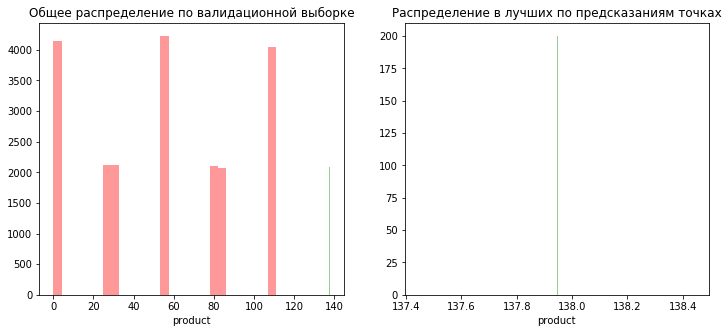

__________________________________________
Регион 3
Прибыль от разработки 200 скважин составляет 2.7103499635998327 млрд рублей
Общее количество нефти 28.24522214133296 млн баррелей
Cреднее значение запасов нефти на скважину 141.22611070666485 тысяч баррелей


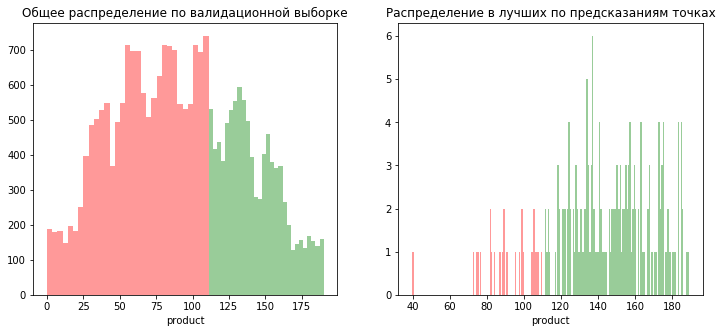

__________________________________________


In [13]:
for i in range(len(targets_and_predicts)):
    df_target_and_predict = targets_and_predicts[i]
    result = calculate_profit(df_target_and_predict)
    print('Регион',i+1)
    print('Прибыль от разработки',result.get('wells'),'скважин составляет',result.get('profit')/1000000000,'млрд рублей')
    print('Общее количество нефти',result.get('product_volume_sum')/1000,'млн баррелей')
    print('Cреднее значение запасов нефти на скважину',result.get('product_volume_avg'),'тысяч баррелей')
    
    fig, (ax1,ax2) = plt.subplots(ncols=2)
    fig.set_size_inches(12, 5)    
    sns.distplot(targets_and_predicts[i].query('product >= @required_volume_per_well')['product'], kde=False, ax=ax1, color='green')
    sns.distplot(targets_and_predicts[i].query('product < @required_volume_per_well')['product'], kde=False, ax=ax1, color='red').set_title('Общее распределение по валидационной выборке')
    xmin,xmax=result.get('best_predicted_wells')['product'].min(),result.get('best_predicted_wells')['product'].max()
    sns.distplot(result.get('best_predicted_wells').query('product >= @required_volume_per_well')['product'], kde=False, ax=ax2, color='green', hist_kws={"range": [xmin,xmax]}, bins=wells)
    sns.distplot(result.get('best_predicted_wells').query('product < @required_volume_per_well')['product'], kde=False, ax=ax2, color='red', hist_kws={"range": [xmin,xmax]}, bins=wells).set_title('Распределение в лучших по предсказаниям точках')
    plt.show()
    print('_'*42)

Прменим бутстреп - тысячу раз выберем из валидационной выборки подвыборку из 500 случайных записей. Далее выберем 200 скважин с наилучшими значенями по предсказаниям нашей модели. По каждой такой выборке расчитаем прибыль и посмотрим распределение

Регион 1


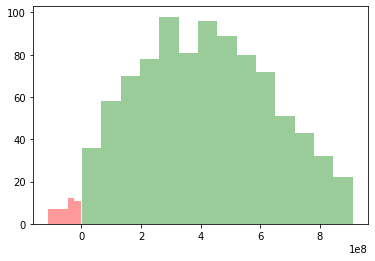

Средняя прибыль: 0.3965388945381462 млрд
Доверительный интервал: -0.11121554589049526 млрд - 0.9097669415534224 млрд
Риск убыточной разработки региона: 0.22
__________________________________________
Регион 2


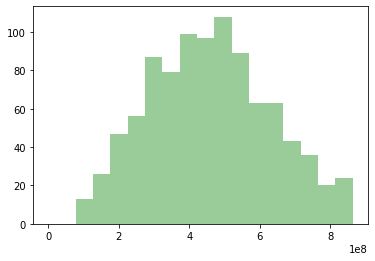

Средняя прибыль: 0.46011863833314415 млрд
Доверительный интервал: 0.07805081075174171 млрд - 0.8629520602637235 млрд
Риск убыточной разработки региона: 0.0
__________________________________________
Регион 3


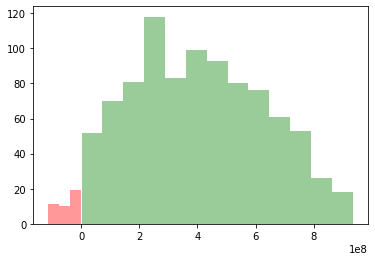

Средняя прибыль: 0.3915556230294394 млрд
Доверительный интервал: -0.11222762537857565 млрд - 0.9345629145511636 млрд
Риск убыточной разработки региона: 0.2
__________________________________________


In [14]:
state = np.random.RandomState(12345)
for i in range(len(targets_and_predicts)):
    values = []
    for j in range(1000):
        subsample = targets_and_predicts[i].sample(n=500, replace=True, random_state=state)
        result = calculate_profit(subsample)
        profit = result.get('profit')
        values.append(profit)
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    values = values[(values>lower) & (values<upper)]
    sns.distplot(values[values<0], kde=False, color='red')
    sns.distplot(values[values>=0], kde=False, color='green')
    print('Регион',i+1)
    plt.show()
    print('Средняя прибыль:',values.mean()/1000000000,'млрд')
    print('Доверительный интервал:',lower/1000000000,'млрд -',upper/1000000000,'млрд')
    print('Риск убыточной разработки региона:', values[values<0].count()/wells)
    print('_'*42)

### Вывод
Для трех регионов были построены модели и предсказаны объемы запсов нефти каждой из скважин. После сравнения с реальными значениями запасов нефти и учтя ограничения на количество исследуемых точек и количество скважин, мы посчитали возможную прибыль от разработки региона. Несмотря на то, что в 1 и 3 регионах среднее значение запасов на скважину больше чем во втором (и верхняя граница доверительного интервала больше), риск убыточной разработки в этих регионах существенный. По результатам исследований можно рекомендовать для разработки второй регион - риски в отличии от других регионов нулевые, средняя прибыль больше.